In [1]:
# Import packages and modules
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df  = pd.read_csv("/kaggle/input/dataset-dk3619-preprocessed-v1/dataset_dk3619_preprocessed_v1.csv")

In [3]:
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3323747 entries, 0 to 3323746
Data columns (total 44 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   HourUTC          3323747 non-null  object 
 1   HourDK           3323747 non-null  object 
 2   DK3619Code       3323747 non-null  object 
 3   hour             3323747 non-null  int64  
 4   day_of_week      3323747 non-null  int64  
 5   weekday_name     3323747 non-null  object 
 6   quarter          3323747 non-null  int64  
 7   month            3323747 non-null  int64  
 8   year             3323747 non-null  int64  
 9   day_of_year      3323747 non-null  int64  
 10  day_of_month     3323747 non-null  int64  
 11  week_of_year     3323747 non-null  int64  
 12  season           3323747 non-null  object 
 13  holiday          3323747 non-null  int64  
 14  DK36Code         3323747 non-null  object 
 15  DK36Title        3323747 non-null  object 
 16  DK19Code         3

In [4]:
import pandas as pd

# Giả sử dữ liệu của bạn được đọc vào một DataFrame có tên là df
# df = pd.read_csv('file_path.csv')  # Đọc dữ liệu từ file CSV nếu cần

# Xóa tất cả các hàng có giá trị null
df_cleaned = df.dropna()

# Kiểm tra lại kết quả
print(df_cleaned.info(show_counts = True))


<class 'pandas.core.frame.DataFrame'>
Index: 3322211 entries, 1467 to 3323746
Data columns (total 44 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   HourUTC          3322211 non-null  object 
 1   HourDK           3322211 non-null  object 
 2   DK3619Code       3322211 non-null  object 
 3   hour             3322211 non-null  int64  
 4   day_of_week      3322211 non-null  int64  
 5   weekday_name     3322211 non-null  object 
 6   quarter          3322211 non-null  int64  
 7   month            3322211 non-null  int64  
 8   year             3322211 non-null  int64  
 9   day_of_year      3322211 non-null  int64  
 10  day_of_month     3322211 non-null  int64  
 11  week_of_year     3322211 non-null  int64  
 12  season           3322211 non-null  object 
 13  holiday          3322211 non-null  int64  
 14  DK36Code         3322211 non-null  object 
 15  DK36Title        3322211 non-null  object 
 16  DK19Code         332

In [5]:
df

,HourUTC,HourDK,DK3619Code,hour,day_of_week,weekday_name,quarter,month,year,day_of_year,...,lag_39,lag_40,lag_41,lag_42,lag_43,lag_44,lag_45,lag_46,lag_47,lag_48
0,2012-06-01T23:00:00,2012-06-02 01:00:00,M_MA,1,5,Saturday,2,6,2012,154,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-06-01T23:00:00,2012-06-02 01:00:00,C_CE_CF_CD,1,5,Saturday,2,6,2012,154,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-06-02T00:00:00,2012-06-02 02:00:00,G_G,2,5,Saturday,2,6,2012,154,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-06-02T00:00:00,2012-06-02 02:00:00,Q_QA,2,5,Saturday,2,6,2012,154,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-06-02T00:00:00,2012-06-02 02:00:00,P_P,2,5,Saturday,2,6,2012,154,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3323742,2024-06-21T21:00:00,2024-06-21 23:00:00,E_E,23,4,Friday,2,6,2024,173,...,87.618240,82.821385,70.622805,61.690048,62.361953,65.590067,64.432311,68.518896,72.014153,75.413964
3323743,2024-06-21T21:00:00,2024-06-21 23:00:00,F_F,23,4,Friday,2,6,2024,173,...,37.126816,36.460320,29.888800,23.870010,22.132825,25.656644,25.505458,25.846402,26.237788,27.272171
3323744,2024-06-21T21:00:00,2024-06-21 23:00:00,I_I,23,4,Friday,2,6,2024,173,...,85.969801,76.281388,66.476163,57.967190,52.255899,51.656221,52.373241,54.961426,60.072132,67.941572
3323745,2024-06-21T21:00:00,2024-06-21 23:00:00,H_H,23,4,Friday,2,6,2024,173,...,151.689095,145.202948,134.877695,120.354189,105.771501,108.005934,111.028472,125.453933,132.191272,130.828517


In [6]:
df_cleaned

,HourUTC,HourDK,DK3619Code,hour,day_of_week,weekday_name,quarter,month,year,day_of_year,...,lag_39,lag_40,lag_41,lag_42,lag_43,lag_44,lag_45,lag_46,lag_47,lag_48
1467,2012-06-03T23:00:00,2012-06-04 01:00:00,M_MA,1,0,Monday,2,6,2012,156,...,13.824711,13.694861,12.922770,12.553444,12.089538,12.042611,12.151106,12.189308,11.898054,0.068992
1489,2012-06-03T23:00:00,2012-06-04 01:00:00,C_CE_CF_CD,1,0,Monday,2,6,2012,156,...,97.184364,97.093674,96.370445,95.223534,94.855904,94.575890,94.900558,94.214874,94.382088,8.836999
1490,2012-06-04T00:00:00,2012-06-04 02:00:00,O_O,2,0,Monday,2,6,2012,156,...,62.669842,62.773857,60.122555,56.666725,53.761436,49.608936,45.899372,46.200718,46.865311,47.197079
1491,2012-06-04T00:00:00,2012-06-04 02:00:00,H_H,2,0,Monday,2,6,2012,156,...,26.120724,31.994280,26.535959,25.718319,25.528309,24.415733,26.221659,26.492964,26.954473,26.933138
1492,2012-06-04T00:00:00,2012-06-04 02:00:00,R_R,2,0,Monday,2,6,2012,156,...,15.675517,14.210869,11.825861,9.973243,8.043448,6.853898,6.383632,6.311064,6.546678,6.785315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3323742,2024-06-21T21:00:00,2024-06-21 23:00:00,E_E,23,4,Friday,2,6,2024,173,...,87.618240,82.821385,70.622805,61.690048,62.361953,65.590067,64.432311,68.518896,72.014153,75.413964
3323743,2024-06-21T21:00:00,2024-06-21 23:00:00,F_F,23,4,Friday,2,6,2024,173,...,37.126816,36.460320,29.888800,23.870010,22.132825,25.656644,25.505458,25.846402,26.237788,27.272171
3323744,2024-06-21T21:00:00,2024-06-21 23:00:00,I_I,23,4,Friday,2,6,2024,173,...,85.969801,76.281388,66.476163,57.967190,52.255899,51.656221,52.373241,54.961426,60.072132,67.941572
3323745,2024-06-21T21:00:00,2024-06-21 23:00:00,H_H,23,4,Friday,2,6,2024,173,...,151.689095,145.202948,134.877695,120.354189,105.771501,108.005934,111.028472,125.453933,132.191272,130.828517


### Choose Feauture will use for Model

In [7]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3322211 entries, 1467 to 3323746
Data columns (total 44 columns):
 #   Column           Dtype  
---  ------           -----  
 0   HourUTC          object 
 1   HourDK           object 
 2   DK3619Code       object 
 3   hour             int64  
 4   day_of_week      int64  
 5   weekday_name     object 
 6   quarter          int64  
 7   month            int64  
 8   year             int64  
 9   day_of_year      int64  
 10  day_of_month     int64  
 11  week_of_year     int64  
 12  season           object 
 13  holiday          int64  
 14  DK36Code         object 
 15  DK36Title        object 
 16  DK19Code         object 
 17  DK19Title        object 
 18  Consumption_MWh  float64
 19  lag_24           float64
 20  lag_25           float64
 21  lag_26           float64
 22  lag_27           float64
 23  lag_28           float64
 24  lag_29           float64
 25  lag_30           float64
 26  lag_31           float64
 27  lag_32        

In [8]:
df_cleaned['DK3619Code'].unique()

array(['M_MA', 'C_CE_CF_CD', 'O_O', 'H_H', 'R_R', 'Q_QB', 'Q_QA', 'N_N',
       'I_I', 'M_MB', 'L_L', 'K_K', 'J_JB_JC', 'J_JA', 'S_S', 'P_P',
       'M_MC', 'C_CI', 'C_CK', 'E_E', 'D_D', 'C_CM_CB', 'C_CL', 'C_CJ',
       'G_G', 'C_CH', 'C_CG', 'C_CC', 'C_CA', 'F_F', 'A_A', 'PR_PR'],
      dtype=object)

In [9]:
columns = ['HourUTC', 'HourDK', 'hour', 'day_of_week',
           'quarter', 'month', 'year', 'day_of_year',
           'day_of_month', 'week_of_year', 'season', 'holiday', 
           'lag_24','lag_25','lag_26','lag_27','lag_28','lag_29',
           'lag_30','lag_31','lag_32','lag_33','lag_34','lag_35','lag_36',
           'lag_37','lag_38','lag_39','lag_40','lag_41','lag_42','lag_43',
           'lag_44','lag_45','lag_46','lag_47','lag_48','Consumption_MWh']

df_filter = df_cleaned[df_cleaned['DK3619Code'] == 'M_MA']

df_corr = df_filter[columns]
#df_corr = pd.get_dummies(df_corr, columns=['DK3619Code'], prefix=['DK3619Code'])


In [10]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105623 entries, 1467 to 3323719
Data columns (total 38 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   HourUTC          105623 non-null  object 
 1   HourDK           105623 non-null  object 
 2   hour             105623 non-null  int64  
 3   day_of_week      105623 non-null  int64  
 4   quarter          105623 non-null  int64  
 5   month            105623 non-null  int64  
 6   year             105623 non-null  int64  
 7   day_of_year      105623 non-null  int64  
 8   day_of_month     105623 non-null  int64  
 9   week_of_year     105623 non-null  int64  
 10  season           105623 non-null  object 
 11  holiday          105623 non-null  int64  
 12  lag_24           105623 non-null  float64
 13  lag_25           105623 non-null  float64
 14  lag_26           105623 non-null  float64
 15  lag_27           105623 non-null  float64
 16  lag_28           105623 non-null  float

In [11]:
### Season mapping 

seasons_mapping = {
    'Spring': 0,
    'Summer': 1,
    'Autumn': 2,
    'Winter': 3
}

df_corr['season'] = df_corr['season'].map(seasons_mapping)

/tmp/ipykernel_23/3343511339.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['season'] = df_corr['season'].map(seasons_mapping)


In [12]:
# Convert holiday to binary indicator
df_corr['holiday'] = df_corr['holiday'].apply(lambda x: 0 if x == 0 else 1)

/tmp/ipykernel_23/3026962626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['holiday'] = df_corr['holiday'].apply(lambda x: 0 if x == 0 else 1)


In [13]:
df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])

/tmp/ipykernel_23/1245307159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_23/1245307159.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])


In [14]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105623 entries, 1467 to 3323719
Data columns (total 38 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   HourUTC          105623 non-null  datetime64[ns]
 1   HourDK           105623 non-null  datetime64[ns]
 2   hour             105623 non-null  int64         
 3   day_of_week      105623 non-null  int64         
 4   quarter          105623 non-null  int64         
 5   month            105623 non-null  int64         
 6   year             105623 non-null  int64         
 7   day_of_year      105623 non-null  int64         
 8   day_of_month     105623 non-null  int64         
 9   week_of_year     105623 non-null  int64         
 10  season           105623 non-null  int64         
 11  holiday          105623 non-null  int64         
 12  lag_24           105623 non-null  float64       
 13  lag_25           105623 non-null  float64       
 14  lag_26           1056

### Split data

In [15]:
df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)

In [16]:
# Drop datetime columns after splitting
df_train = df_train.drop(['HourUTC', 'HourDK'], axis=1)
df_valid = df_valid.drop(['HourUTC', 'HourDK'], axis=1)
df_test = df_test.drop(['HourUTC', 'HourDK'], axis=1)

# Define target and features
y_train = df_train[['Consumption_MWh']]  # Target variable
x_train = df_train.drop(columns=['Consumption_MWh'])  # Features

y_valid = df_valid[['Consumption_MWh']]
x_valid = df_valid.drop(columns=['Consumption_MWh'])

y_test = df_test[['Consumption_MWh']]
x_test = df_test.drop(columns=['Consumption_MWh'])

In [17]:
df_train.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Index: 67152 entries, 1467 to 2092649
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hour             67152 non-null  int64  
 1   day_of_week      67152 non-null  int64  
 2   quarter          67152 non-null  int64  
 3   month            67152 non-null  int64  
 4   year             67152 non-null  int64  
 5   day_of_year      67152 non-null  int64  
 6   day_of_month     67152 non-null  int64  
 7   week_of_year     67152 non-null  int64  
 8   season           67152 non-null  int64  
 9   holiday          67152 non-null  int64  
 10  lag_24           67152 non-null  float64
 11  lag_25           67152 non-null  float64
 12  lag_26           67152 non-null  float64
 13  lag_27           67152 non-null  float64
 14  lag_28           67152 non-null  float64
 15  lag_29           67152 non-null  float64
 16  lag_30           67152 non-null  float64
 17  lag_31      

In [18]:
df_test.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Index: 37775 entries, 2114953 to 3323719
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hour             37775 non-null  int64  
 1   day_of_week      37775 non-null  int64  
 2   quarter          37775 non-null  int64  
 3   month            37775 non-null  int64  
 4   year             37775 non-null  int64  
 5   day_of_year      37775 non-null  int64  
 6   day_of_month     37775 non-null  int64  
 7   week_of_year     37775 non-null  int64  
 8   season           37775 non-null  int64  
 9   holiday          37775 non-null  int64  
 10  lag_24           37775 non-null  float64
 11  lag_25           37775 non-null  float64
 12  lag_26           37775 non-null  float64
 13  lag_27           37775 non-null  float64
 14  lag_28           37775 non-null  float64
 15  lag_29           37775 non-null  float64
 16  lag_30           37775 non-null  float64
 17  lag_31   

### Train data

In [19]:
rf_model = RandomForestRegressor(n_estimators=1000, random_state=10)
rf_model.fit(x_train, y_train)

/tmp/ipykernel_23/3321662033.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


RandomForestRegressor(n_estimators=1000, random_state=10)

## Predict

In [20]:
y_pred = rf_model.predict(x_test)
y_pred

array([32.13057231, 32.10455037, 31.87595018, ..., 35.96342163,
       35.21402232, 34.78945496])

In [21]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

Mean Absolute Error (MAE): 2.4809684531911045
Mean Squared Error (MSE): 17.162789507596415
Root Mean Squared Error (RMSE): 4.142799718499123
R-squared (R²): 0.8072614735288652


In [22]:
# Check the lengths of features and feature importances
features = x_train.columns
feature_importances = rf_model.feature_importances_
print(f'Number of features: {len(features)}')
print(f'Number of importances: {len(feature_importances)}')

Number of features: 35
Number of importances: 35


In [23]:
# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [24]:
importance_df

,Feature,Importance
10,lag_24,0.713356
1,day_of_week,0.136258
0,hour,0.045354
4,year,0.020159
33,lag_47,0.013031
9,holiday,0.007538
34,lag_48,0.007461
5,day_of_year,0.006326
11,lag_25,0.003575
19,lag_33,0.003417


In [25]:
#importance_df = importance_df.drop(importance_df[importance_df['Feature'] == 'weekday_name'].index)

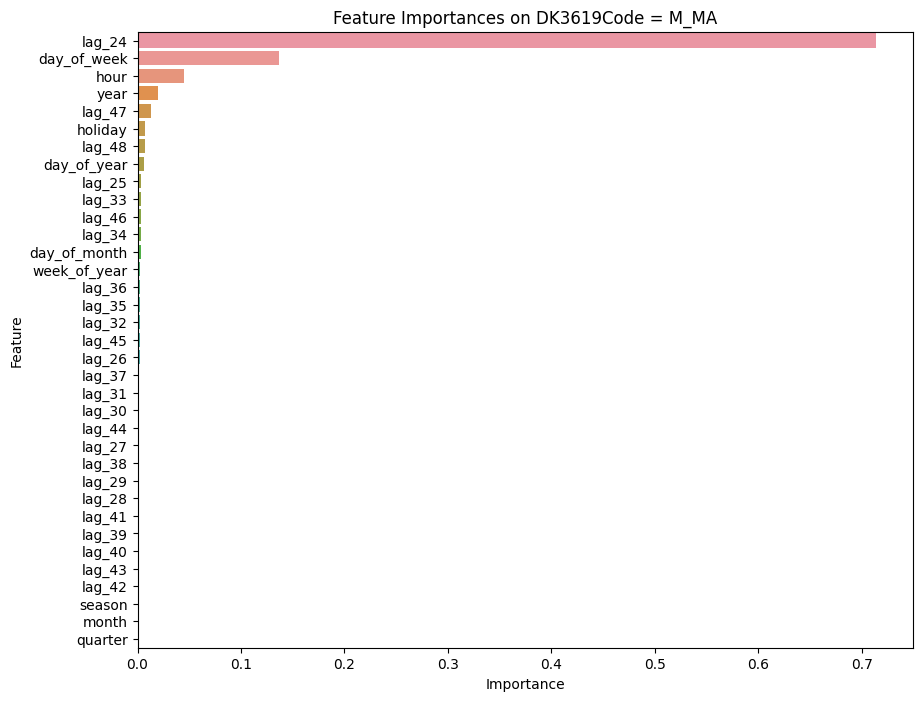

In [26]:
# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances on DK3619Code = M_MA')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Sau khi đã chọn được feature

In [27]:
columns = ['HourUTC', 'HourDK', 
           'hour', 
           'day_of_week',
           'year', 
           'lag_24',
           'lag_47',
           'Consumption_MWh']


df_filter = df_cleaned[df_cleaned['DK3619Code'] == 'M_MA']

df_corr = df_filter[columns]
#df_corr = pd.get_dummies(df_corr, columns=['DK3619Code'], prefix=['DK3619Code'])

# Convert holiday to binary indicator
#df_corr['holiday'] = df_corr['holiday'].apply(lambda x: 0 if x == 0 else 1)

In [28]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105623 entries, 1467 to 3323719
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   HourUTC          105623 non-null  object 
 1   HourDK           105623 non-null  object 
 2   hour             105623 non-null  int64  
 3   day_of_week      105623 non-null  int64  
 4   year             105623 non-null  int64  
 5   lag_24           105623 non-null  float64
 6   lag_47           105623 non-null  float64
 7   Consumption_MWh  105623 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 7.3+ MB


In [29]:
df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])

df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)

# Drop datetime columns after splitting
df_train = df_train.drop(['HourUTC', 'HourDK'], axis=1)
df_valid = df_valid.drop(['HourUTC', 'HourDK'], axis=1)
df_test = df_test.drop(['HourUTC', 'HourDK'], axis=1)

# Define target and features
y_train = df_train[['Consumption_MWh']]  # Target variable
x_train = df_train.drop(columns=['Consumption_MWh'])  # Features

y_valid = df_valid[['Consumption_MWh']]
x_valid = df_valid.drop(columns=['Consumption_MWh'])

y_test = df_test[['Consumption_MWh']]
x_test = df_test.drop(columns=['Consumption_MWh'])

/tmp/ipykernel_23/2224914049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_23/2224914049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])


In [30]:
df_train.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Index: 67152 entries, 1467 to 2092649
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hour             67152 non-null  int64  
 1   day_of_week      67152 non-null  int64  
 2   year             67152 non-null  int64  
 3   lag_24           67152 non-null  float64
 4   lag_47           67152 non-null  float64
 5   Consumption_MWh  67152 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 3.6 MB


In [31]:
rf_feature_model = RandomForestRegressor(n_estimators=1000, random_state=10)
rf_feature_model.fit(x_train, y_train)

/tmp/ipykernel_23/1427580338.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_feature_model.fit(x_train, y_train)


RandomForestRegressor(n_estimators=1000, random_state=10)

In [32]:
y_pred = rf_feature_model.predict(x_test)
y_pred

array([31.4515703 , 31.38074251, 31.5997587 , ..., 36.34767187,
       36.39367252, 34.2907103 ])

In [33]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

Mean Absolute Error (MAE): 2.8798786673714365
Mean Squared Error (MSE): 20.865642953200005
Root Mean Squared Error (RMSE): 4.567892616207172
R-squared (R²): 0.7656783429702624


In [34]:
def compute_predictions_df(model, X, y):
    y_pred = model.predict(X)
    df = pd.DataFrame({'actual': y.values.flatten(), 'prediction': y_pred.flatten()}, index=X.index)
    df["squared_error"] = (df["actual"] - df["prediction"])**2
    return df

pred_df = compute_predictions_df(rf_feature_model, x_test, y_test)
pred_df.head()

,actual,prediction,squared_error
2114953,32.316631,31.451570,0.748330
2114986,31.509554,31.380743,0.016592
2115020,31.603830,31.599759,0.000017
2115051,31.697868,31.450101,0.061389
2115082,31.886505,30.913752,0.946249


In [35]:
df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])

df_corr = df_corr.sort_values(by='HourDK')

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

# Split the data
split_time = pd.Timestamp("2020-02-01")
df_train, df_temp = split_train_test(df_corr, split_time)
split_time_valid = pd.Timestamp("2020-03-01")
df_valid, df_test = split_train_test(df_temp, split_time_valid)

In [36]:
df_test.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Index: 37775 entries, 2114953 to 3323719
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   HourUTC          37775 non-null  datetime64[ns]
 1   HourDK           37775 non-null  datetime64[ns]
 2   hour             37775 non-null  int64         
 3   day_of_week      37775 non-null  int64         
 4   year             37775 non-null  int64         
 5   lag_24           37775 non-null  float64       
 6   lag_47           37775 non-null  float64       
 7   Consumption_MWh  37775 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(3)
memory usage: 2.6 MB


In [37]:
# Assume 'data' is the additional DataFrame you want to merge into df_corr
# Merge data into df_corr
pred_df = pd.merge(df_test, pred_df, left_index=True, right_index=True)
pred_df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Index: 37775 entries, 2114953 to 3323719
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   HourUTC          37775 non-null  datetime64[ns]
 1   HourDK           37775 non-null  datetime64[ns]
 2   hour             37775 non-null  int64         
 3   day_of_week      37775 non-null  int64         
 4   year             37775 non-null  int64         
 5   lag_24           37775 non-null  float64       
 6   lag_47           37775 non-null  float64       
 7   Consumption_MWh  37775 non-null  float64       
 8   actual           37775 non-null  float64       
 9   prediction       37775 non-null  float64       
 10  squared_error    37775 non-null  float64       
dtypes: datetime64[ns](2), float64(6), int64(3)
memory usage: 3.5 MB


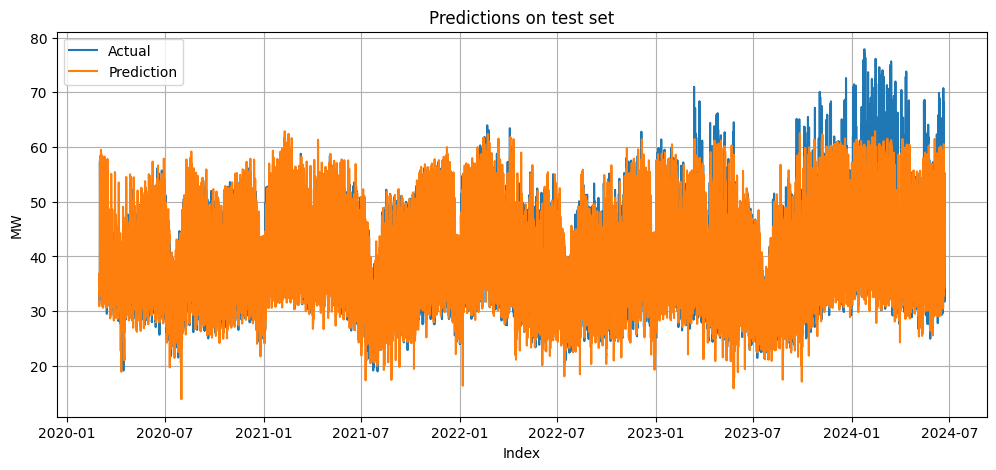

In [38]:
plt.figure(figsize=(12, 5))
start = pred_df['HourDK'].min()
end = pred_df['HourDK'].max()
plt.plot(pred_df['HourDK'], pred_df['actual'], label='Actual')
plt.plot(pred_df['HourDK'], pred_df['prediction'], label='Prediction')
plt.title('Predictions on test set')
plt.xlabel('Index')
plt.ylabel('MW')
plt.legend()
plt.grid()
plt.show()

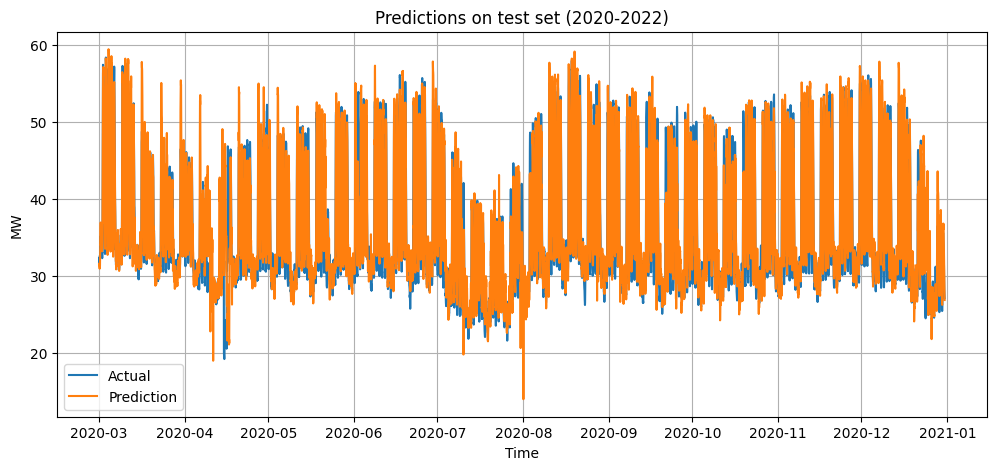

In [39]:
# Filter pred_df based on the desired timeframe (assuming HourDK is a datetime column)
pred_df_filtered = pred_df[(pred_df['HourDK'] >= '2020-01-01') & (pred_df['HourDK'] <= '2020-12-31')]

plt.figure(figsize=(12, 5))
plt.plot(pred_df_filtered['HourDK'], pred_df_filtered['actual'], label='Actual')
plt.plot(pred_df_filtered['HourDK'], pred_df_filtered['prediction'], label='Prediction')
plt.title('Predictions on test set (2020-2022)')
plt.xlabel('Time')
plt.ylabel('MW')
plt.legend()
plt.grid()
plt.show()

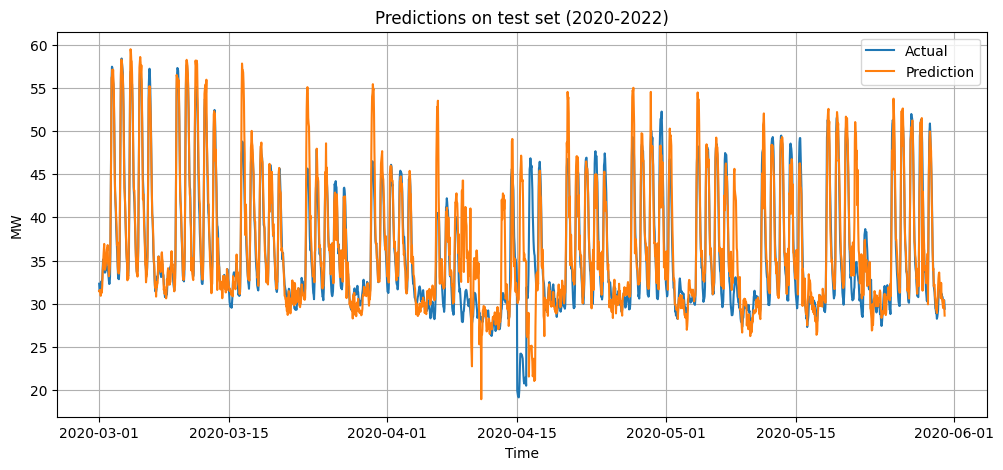

In [40]:
# Filter pred_df based on the desired timeframe (assuming HourDK is a datetime column)
pred_df_filtered = pred_df[(pred_df['HourDK'] >= '2020-01-01') & (pred_df['HourDK'] <= '2020-05-31')]

plt.figure(figsize=(12, 5))
plt.plot(pred_df_filtered['HourDK'], pred_df_filtered['actual'], label='Actual')
plt.plot(pred_df_filtered['HourDK'], pred_df_filtered['prediction'], label='Prediction')
plt.title('Predictions on test set (2020-2022)')
plt.xlabel('Time')
plt.ylabel('MW')
plt.legend()
plt.grid()
plt.show()